In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as stl
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
# read dataset
exchange_rates = pd.read_csv('Data/euro-daily-hist_1999_2022.csv')

In [4]:
# inspect the dataset
exchange_rates.head(5)
exchange_rates.tail(5)
exchange_rates.info()
# 6456 rows and 41 columns, null values in different columns, some data types should have been numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6456 non-null   object 
 1   [Australian dollar ]      6456 non-null   object 
 2   [Bulgarian lev ]          6054 non-null   object 
 3   [Brazilian real ]         6188 non-null   object 
 4   [Canadian dollar ]        6456 non-null   object 
 5   [Swiss franc ]            6456 non-null   object 
 6   [Chinese yuan renminbi ]  6188 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6456 non-null   object 
 9   [Danish krone ]           6456 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6456 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6456 non-null   object 
 14  [Croatia

In [5]:
# rename column names and change data type
exchange_rates.rename(columns = {'[US dollar ]': 'US_dollar',
                                'Period\\Unit:': 'Time'},
                     inplace = True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace = True)
exchange_rates.reset_index(drop = True, inplace = True)

In [6]:
# isolate the Time and the US_dollar columns
euro_to_dollar = exchange_rates[['Time', 'US_dollar']]

euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.0888     7
1.0868     7
          ..
1.4304     1
1.4350     1
1.4442     1
1.4389     1
1.0804     1
Name: US_dollar, Length: 3769, dtype: int64

In [7]:
# drop '-' columns and convert the data into float
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'].astype(float)

0       1.1789
1       1.1790
2       1.1743
3       1.1632
4       1.1659
         ...  
6451    1.0757
6452    1.0804
6453    1.0787
6454    1.0919
6455    1.0946
Name: US_dollar, Length: 6394, dtype: float64

In [8]:
rolling_mean = euro_to_dollar['US_dollar'].rolling(30).mean()

Try to calculate the euro-dollar exchange rate during different presidential terms (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021))

In [9]:
euro_to_dollar

,Time,US_dollar
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659
...,...,...
6451,2023-12-11,1.0757
6452,2023-12-12,1.0804
6453,2023-12-13,1.0787
6454,2023-12-14,1.0919


In [10]:
Bush = euro_to_dollar[euro_to_dollar['Time'].dt.year.between(2001, 2009)]
Bush['monthly_mean'] = Bush['US_dollar'].rolling(20).mean()
Bush['year'] = Bush['Time'].dt.year

Obama = euro_to_dollar[euro_to_dollar['Time'].dt.year.between(2009, 2017)]
Obama['monthly_mean'] = Obama['US_dollar'].rolling(20).mean()

Trump = euro_to_dollar[euro_to_dollar['Time'].dt.year.between(2017, 2021)]
Trump['monthly_mean'] = Trump['US_dollar'].rolling(20).mean()

euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(20).mean()
euro_to_dollar

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
6451,2023-12-11,1.0757,1.086910
6452,2023-12-12,1.0804,1.087310
6453,2023-12-13,1.0787,1.086905
6454,2023-12-14,1.0919,1.087255


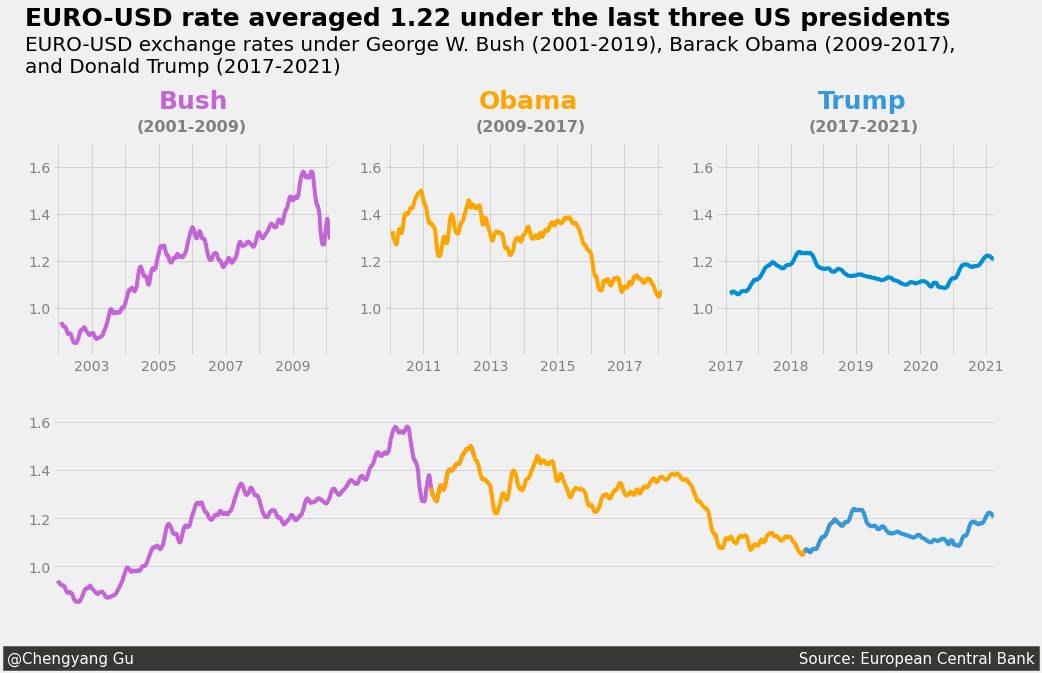

In [11]:
stl.use('fivethirtyeight')
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15,8))

axes[0, 0].plot(Bush['Time'], Bush['monthly_mean'], color = '#c365d6')
axes[0, 0].set_xticks(['2001', '2003', '2005', '2007', '2009'], minor = True)
axes[0, 0].set_xticklabels(['2001', '', '2003', '', '2005', '', '2007', '', '2009'])
axes[0, 0].set_xlim(dt.datetime(2000, 11, 15), dt.datetime(2009, 2, 15))
axes[0, 0].text(dt.datetime(2004, 1, 1), 1.85, 'Bush', size = 25, weight = 'bold', color = '#c365d6')
axes[0, 0].text(dt.datetime(2003, 5, 1), 1.75, '(2001-2009)', size = 16, weight = 'bold', color = 'grey')
#axes[0, 0].set_yticks([1.0, 1.2, 1.4, 1.6])

axes[0, 1].plot(Obama['Time'], Obama['monthly_mean'], color = 'orange')
axes[0, 1].set_xlim(dt.datetime(2008, 11, 15), dt.datetime(2017, 2, 15))
axes[0, 1].set_xticks(['2009', '2011', '2013', '2015', '2017'], minor = True)
axes[0, 1].set_xticklabels(['2009', '', '2011', '', '2013', '', '2015', '', '2017'])
axes[0, 1].text(dt.datetime(2011, 9, 1), 1.85, 'Obama', size = 25, weight = 'bold', color = 'orange')
axes[0, 1].text(dt.datetime(2011, 7, 20), 1.75, '(2009-2017)', size = 16, weight = 'bold', color = 'grey')
#axes[0, 1].set_yticks([1.0, 1.2, 1.4, 1.6])

axes[0, 2].plot(Trump['Time'], Trump['monthly_mean'])
axes[0, 2].set_xticks(['2017', '2018', '2019', '2020', '2021'], minor = True)
axes[0, 2].set_xticklabels(['2017', '', '2018', '', '2019', '', '2020', '', '2021'])
axes[0, 2].set_xlim(dt.datetime(2016, 11, 15), dt.datetime(2021, 2, 15))
axes[0, 2].text(dt.datetime(2018, 6, 1), 1.85, 'Trump', size = 25, weight = 'bold', color = '#3498db')
axes[0, 2].text(dt.datetime(2018, 4, 10), 1.75, '(2017-2021)', size = 16, weight = 'bold', color = 'grey')
#axes[0, 2].set_yticks([1.0, 1.2, 1.4, 1.6])

for i in range(0, 3):
    axes[0, i].set_yticks([1.0, 1.2, 1.4, 1.6])
    axes[0, i].tick_params(bottom = False, left = False)
    axes[0, i].set_ylim(0.8, 1.7)
    axes[0 ,i].tick_params(axis='x', colors='gray')
    axes[0 ,i].tick_params(axis='y', colors='gray')
    axes[0, i].grid(axis = 'both', alpha = 0.8)
    for location in ['top', 'bottom', 'left', 'right']:
        axes[0, i].spines[location].set_visible(False)
        
        
axes[1, 0] = plt.subplot2grid((2, 3), (1, 0), colspan=3)
axes[1, 0].plot(euro_to_dollar['Time'], euro_to_dollar['rolling_mean'], alpha = 0)
axes[1, 0].plot(Bush['Time'], Bush['monthly_mean'], color = '#c365d6')
axes[1, 0].plot(Obama['Time'], Obama['monthly_mean'], color = 'orange')
axes[1, 0].plot(Trump['Time'], Trump['monthly_mean'], color = '#3498db')
axes[1, 0].set_yticks([1.0, 1.2, 1.4, 1.6])
axes[1, 0].set_ylim(0.82, 1.7)
axes[1, 0].set_xlim(dt.datetime(2001, 1, 1), dt.datetime(2021, 2, 15))
axes[1, 0].grid(axis = 'y', alpha = 0.8)
axes[1, 0].xaxis.set_visible(False)
axes[1, 0].tick_params(axis='y', colors='gray')

for location in ['top', 'bottom', 'left', 'right']:
        axes[1, 0].spines[location].set_visible(False)
        

axes[0, 0].text(dt.datetime(2000, 1, 1), 2.2, 'EURO-USD rate averaged 1.22 under the last three US presidents',
               size = 25, weight = 'bold')
axes[0, 0].text(dt.datetime(2000, 1, 1), 2.0, 'EURO-USD exchange rates under George W. Bush (2001-2019), Barack Obama (2009-2017), \nand Donald Trump (2017-2021)',
               size = 20)

axes[1, 0].text(dt.datetime(2000, 1, 1), 0.6, '@Chengyang Gu' + ' '*140 + 'Source: European Central Bank',
                color = 'white',
                backgroundcolor = '#383734',
                size = 15)

plt.show()
